<a href="https://colab.research.google.com/github/codehacker4655/ML-with-theory-inform-of-comments-/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# WHEN TO REMOVE OUTLIERS
# ===============================
# 1. Remove outliers if they are ERRORS or IRRELEVANT EXTREMES:
#    - Caused by data entry errors, sensor malfunctions, wrong units.
#      Example: Height recorded as 250 cm instead of 150 cm due to typo.
#    - Not possible in real-world context.
#      Example: Negative age, speed of 900 km/h for a normal car.
#    - Skewing summary statistics in a way that doesn't reflect reality.
#      Example: One millionaire distorting average salary in a middle-class study.
#    - Your model is sensitive to extreme values (e.g., Linear Regression) and they don't belong to target distribution.
#      Example: Predicting normal house prices → exclude luxury palaces.
#    - You want clear visuals/statistics without extreme distortion.

# ===============================
# WHEN TO KEEP OUTLIERS
# ===============================
# 2. Keep outliers if they are REAL and MEANINGFUL:
#    - Represent rare but important events.
#      Example: Fraud cases, disease outbreaks, stock market crashes.
#    - Natural part of the distribution (heavy tails).
#      Example: Earthquake magnitudes, income, rainfall data.
#    - Your model is robust to outliers (e.g., Random Forest, Gradient Boosting).
#    - You want your model to generalize to extreme/rare cases.
#    - Removing them would lose important information (especially in small datasets).

# ===============================
# PRACTICAL WORKFLOW
# ===============================
# Step 1 — Detect:
#   - IQR method: Outlier if value < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
#   - Z-score: Outlier if |z| > 3
#   - Domain-specific rules (e.g., age < 0 or > 120)
#
# Step 2 — Investigate:
#   - Find reason: error, rare event, or natural variation?
#   - Use domain knowledge to verify.
#
# Step 3 — Decide:
#   - If error/unrealistic → Remove or correct.
#   - If valid rare event → Keep, maybe model separately.
#   - If valid but extreme → Keep, but consider transformation (log, scaling) or robust methods.
#
# ===============================
# RULE OF THUMB:
# ===============================
# - Error → Remove
# - Special case / rare event → Keep
# - Model sensitive & irrelevant extreme → Remove or transform
# - Model robust or extremes important → Keep

In [ ]:
# ✅ Linear Regression is built to predict *real-valued outputs*, not categories.
#    - It focuses on minimizing squared error and finding a best-fit line for continuous data.

# ❌ But for classification (like binary 0 or 1), we need more than just numbers:
#    - We need to know *how confident* the model is that a data point belongs to a certain class.
#    - Confidence is naturally measured using *probabilities*, not real values like 1.7 or –0.3.

# ✅ So we shift to Logistic Regression, where:
#    - We still build a linear equation like linear regression.
#    - But instead of outputting raw values, we apply a *sigmoid function*:
#        → This squashes the output into a range of [0, 1], so it becomes interpretable as a probability.

# ✅ With probabilities, we can apply a *threshold*:
#    - If P(y=1|x) ≥ 0.5 → Predict class 1
#    - Else → Predict class 0

# ✅ Also, we change the *loss function*:
#    - Instead of Mean Squared Error (used in linear regression),
#    - We use *log loss / binary cross-entropy*, which is suitable for classification.

# ✅ As a result:
#    - The model is no longer trying to fit a line through real values.
#    - It is trying to *separate classes* using a decision boundary.
#    - And because the output is always between 0 and 1, *outliers won't push it drastically*.

# 🎯 In summary:
#    - Linear regression = real values → not suitable for classification.
#    - Logistic regression = probabilities + threshold → perfect for classification.

In [ ]:
# ============================
# LOGISTIC REGRESSION: TRAINING PIPELINE (NOTES)
# ============================
# Goal: Learn weights (w, b) that map features X -> probability ŷ=P(y=1|x)
# Model: ŷ = σ(z) where z = w·x + b and σ(z)=1/(1+e^-z) (sigmoid).

# 1) Data setup
#    - X: shape (m, n)  -> m samples, n features (scaled/encoded if needed)
#    - y: shape (m,)    -> binary labels {0,1}
#    - Initialize parameters: w (n-dim) ~ small zeros/random, b=0

# 2) Forward pass (compute predictions)
#    - For each batch (or all data):
#         z = X @ w + b               # linear score (shape: (m,))
#         y_hat = sigmoid(z)          # probabilities in [0,1]

# 3) Loss (what we minimize)
#    - Binary cross-entropy (log loss):
#         L = -(1/m) * Σ[ y*log(y_hat) + (1-y)*log(1-y_hat) ]
#    - Why BCE? Heavily penalizes confident wrong predictions; convex for logistic.

# 4) Gradients (how to change w, b)
#    - Derivative of loss wrt z is (y_hat - y)
#    - Using chain rule:
#         dL/dw = (1/m) * X.T @ (y_hat - y)     # shape: (n,)
#         dL/db = (1/m) * Σ (y_hat - y)         # scalar

# 5) Parameter update (Gradient Descent)
#    - With learning rate α:
#         w := w - α * dL/dw
#         b := b - α * dL/db
#    - Repeat steps 2→5 for many epochs until convergence
#      (loss stops decreasing / validation metric stabilizes).

# 6) Regularization (optional but common)
#    - L2 (ridge): add λ * ||w||^2 to loss  → discourages large weights
#      Gradients become: dL/dw += (2λ/m) * w
#    - L1 (lasso): add λ * ||w||₁          → drives some weights to zero (feature selection)

# 7) Class imbalance (optional)
#    - Use class_weight or weighted BCE to give more weight to minority class:
#      L = -(1/m) * Σ[ w_pos*y*log(y_hat) + w_neg*(1-y)*log(1-y_hat) ]

# 8) Stopping & monitoring
#    - Track training + validation loss/metrics each epoch
#    - Early stopping: stop when validation loss stops improving for k epochs

# 9) Prediction after training
#    - For new x:
#         p = sigmoid(w·x + b)
#         label = 1 if p >= threshold else 0
#      (threshold default 0.5; tune if you care about precision/recall trade-off)

# 10) Evaluation metrics
#    - For classification: accuracy, precision, recall, F1, ROC-AUC, PR-AUC
#    - Pick based on problem (e.g., recall for “catch all positives”, precision for “few false alarms”)

# 11) Solvers (sklearn)
#    - 'lbfgs', 'liblinear', 'saga', 'newton-cg' → all minimize the same log loss using different optimizers.
#    - For L1: use 'liblinear' or 'saga'. For large datasets: 'lbfgs' / 'saga'.

# 12) Mini end-to-end loop (pseudo):
#    for epoch in range(E):
#        z = X @ w + b
#        y_hat = 1/(1+exp(-z))
#        L = BCE(y, y_hat) [+ reg]
#        grad_w = (1/m) * X.T @ (y_hat - y) [+ reg_grad]
#        grad_b = (1/m) * sum(y_hat - y)
#        w -= α * grad_w
#        b -= α * grad_b

# That’s the full training story: initialize → forward → loss → gradients → update → repeat → predict.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#to create some datasets
from sklearn.datasets import make_classification

In [ ]:
#by default it will standardized
X,y=make_classification(n_samples=100,n_features=10,n_classes=2,random_state=10)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.179205,-0.873998,-0.050850,-1.123754,-0.268549,-1.857358,-0.216525,0.920364,0.699465,-0.424211
1,0.084140,-1.318627,0.279605,0.620255,0.776471,-1.068568,-0.722621,-0.789816,-1.074807,1.902304
2,0.540541,-1.061695,-0.862758,-0.741825,0.716442,1.105575,-2.017719,-0.804172,-1.029903,-0.286002
3,-1.106123,2.888613,0.676708,0.060728,-0.208229,-0.023041,-0.553318,-1.021707,-0.336402,-1.680446
4,-1.746736,0.982998,-0.479035,-1.289125,-0.658427,-0.974200,-0.194103,0.735513,0.944712,-0.658440


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
#here in l1 and l2 regularisation we generally use alpha but here we use C which is inversely proportional to alpha

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[7.21738700e-02, 9.27826130e-01],
       [7.87913808e-01, 2.12086192e-01],
       [3.31782224e-01, 6.68217776e-01],
       [6.61574927e-01, 3.38425073e-01],
       [8.41822205e-03, 9.91581778e-01],
       [9.13990782e-01, 8.60092178e-02],
       [9.87503496e-01, 1.24965036e-02],
       [7.61992801e-03, 9.92380072e-01],
       [9.96118522e-01, 3.88147849e-03],
       [9.61424667e-01, 3.85753332e-02],
       [8.90365449e-01, 1.09634551e-01],
       [9.84424568e-01, 1.55754318e-02],
       [9.40514478e-01, 5.94855221e-02],
       [4.80053425e-01, 5.19946575e-01],
       [9.25409217e-01, 7.45907834e-02],
       [1.10373391e-02, 9.88962661e-01],
       [6.47417965e-04, 9.99352582e-01],
       [9.49455234e-01, 5.05447661e-02],
       [7.67514932e-01, 2.32485068e-01],
       [7.15018374e-01, 2.84981626e-01],
       [9.71476291e-01, 2.85237093e-02],
       [8.74733255e-01, 1.25266745e-01],
       [8.81484103e-03, 9.91185159e-01],
       [4.20744826e-02, 9.57925517e-01],
       [2.534256

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(f1)
print(recall)
print(precision)
print(cm)

0.9333333333333333
0.9166666666666666
0.9166666666666666
0.9166666666666666
[[17  1]
 [ 1 11]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Hyperparameter Tuning

In [ ]:
# 📌 GridSearchCV – Complete Notes

# ✅ What is GridSearchCV?
# GridSearchCV is a method used to find the best combination of hyperparameters for a given model.
# It performs an exhaustive search over a specified parameter grid.
# For each combination, it uses cross-validation to evaluate the model’s performance.

# ✅ How does it work?
# 1. You specify a dictionary of hyperparameters you want to test.
# 2. GridSearchCV tries every possible combination of those parameters.
# 3. For each combination:
#     - It splits the training data into k folds (cross-validation).
#     - Trains the model using the mathematical logic of the algorithm.
#     - Evaluates performance on validation folds (accuracy, F1, etc.).
# 4. The combination that performs the best is selected.

# ✅ Example:
# For Logistic Regression:
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1, 10],
#     'solver': ['liblinear']
# }
# This will try 6 combinations (2 penalties × 3 C values), training and validating each using cross-validation.

# ✅ Why use it?
# - To avoid manual trial-and-error of hyperparameters.
# - To systematically and reliably find the best model setup.
# - Helps improve model accuracy, reduce overfitting/underfitting.

# ✅ Which models can we use GridSearchCV with?
# GridSearchCV can be used with any scikit-learn model:
# - Linear Regression, Logistic Regression
# - Ridge, Lasso
# - SVM, Random Forest, Decision Trees
# - KNN, Gradient Boosting, etc.

# ✅ What does GridSearchCV use internally?
# - It still uses the internal math logic of the model you pass (e.g., logistic regression uses sigmoid + log loss).
# - It automates training and evaluation across all hyperparameter combinations.

# ✅ Common Parameters in GridSearchCV:
# - estimator: The model you want to tune
# - param_grid: The dictionary of hyperparameters to test
# - scoring: Metric to optimize (e.g., 'accuracy', 'f1', 'recall', 'neg_mean_squared_error')
# - cv: Number of cross-validation folds (e.g., cv=5)
# - verbose: Controls output verbosity

# ✅ Sample Code:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)
# y_pred = grid.predict(X_test)

# ✅ Final Summary:
# GridSearchCV is not a model but a technique to tune models.
# It uses cross-validation and your algorithm’s internal training logic.
# It saves time, improves accuracy, and avoids overfitting from bad hyperparameter choices.

In [ ]:
#here there are 3 penalities and 5 c values and 5 solver so there are total of 75 combinations using stratified cv every combination will be tried and we get the best scores of the parameter

In [ ]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [ ]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
grid.best_score_

np.float64(0.9428571428571428)

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



# Randomized SearchCV

In [ ]:
# 💡 What is RandomizedSearchCV?
# RandomizedSearchCV is a hyperparameter tuning technique similar to GridSearchCV.
# But instead of trying **every** possible combination, it randomly selects a fixed number (n_iter) of combinations to try.

# 🧠 Why use RandomizedSearchCV?
# - Faster than GridSearchCV for large search spaces.
# - Good when you have many hyperparameters or continuous distributions.
# - Reduces computational cost by sampling randomly instead of exhaustively.

# ✅ Key differences from GridSearchCV:
# GridSearchCV → Tries **all** combinations (slow but exhaustive)
# RandomizedSearchCV → Tries **random** combinations (fast, less exhaustive)

# 📌 When to prefer RandomizedSearchCV?
# - When the parameter space is large or continuous (e.g., 'C' in LogisticRegression from 0.1 to 100).
# - When you're okay with a good-enough result instead of the absolute best.
# - When you want faster results with fewer model evaluations.

# 📦 Example:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the base model
model = LogisticRegression(solver='liblinear')

# Define the parameter distributions
param_dist = {
    'C': uniform(0.1, 10),        # Continuous values between 0.1 and 10
    'penalty': ['l1', 'l2']       # Regularization types
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                    # Try only 10 random combinations
    scoring='accuracy',
    cv=5,                         # 5-fold cross-validation
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Best Parameters: {'C': np.float64(0.10778765841014329), 'penalty': 'l2'}
Best Cross-Validation Score: 0.9428571428571428


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model=LogisticRegression()

In [ ]:
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=cv,n_iter=10)

In [ ]:
randomcv.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
randomcv.best_score_

np.float64(0.9428571428571428)

In [ ]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

# multi-class-category

In [ ]:
# -------------------------------------------
# One-vs-Rest (OvR) Logistic Regression Example
# -------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# STEP 1: Create a synthetic dataset with 3 classes
# n_samples = total points
# n_features = total features per point
# n_classes = number of categories (3 in this example)
# n_informative = features that actually help in classification
# n_redundant = extra useless features
X, y = make_classification(
    n_samples=6,
    n_features=4,
    n_classes=3,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

# STEP 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42
)

# STEP 3: Create Logistic Regression model with OvR
# multi_class='ovr' → trains 1 classifier per class vs all other classes
# solver='lbfgs' → optimization method used to fit the model
model = LogisticRegression(multi_class='ovr', solver='lbfgs')

# STEP 4: Train the model on training data
model.fit(X_train, y_train)

# STEP 5: Get probability predictions for each class
# predict_proba() → returns probability for each class for every test sample
probs = model.predict_proba(X_test)
print("Class probabilities for each test sample:\n", probs)

# Example output:
# [
#  [0.70 0.20 0.10]   → 70% Cat, 20% Dog, 10% Rabbit
#  [0.15 0.75 0.10]   → 15% Cat, 75% Dog, 10% Rabbit
#  [0.05 0.10 0.85]   → 5% Cat, 10% Dog, 85% Rabbit
# ]

# STEP 6: Predict the most likely class for each test sample
predictions = model.predict(X_test)
print("Predicted class labels:", predictions)

# Example output:
# [0 1 2] → means Cat (0), Dog (1), Rabbit (2)

# -------------------------------------------
# HOW OvR WORKS DURING PREDICTION:
# 1) Trains separate binary classifiers:
#    Model 1: Class 0 vs (Class 1 + Class 2)
#    Model 2: Class 1 vs (Class 0 + Class 2)
#    Model 3: Class 2 vs (Class 0 + Class 1)
#
# 2) For each test sample:
#    - Each model outputs probability of its class being correct.
#    - The class with the highest probability is chosen.
# -------------------------------------------

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_informative=3,n_features=20,n_classes=3,random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr')

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[71 28  0]
 [16 74  0]
 [12 99  0]]


# Logistic Regression for imbalanced dataset

In [ ]:
# -------------------------------------------------------
# CLASS WEIGHTS IN LOGISTIC REGRESSION (FOR IMBALANCED DATA)
# -------------------------------------------------------

# 1. Why use class_weight?
#    - In imbalanced datasets, the majority class dominates the loss function.
#    - Without class_weight, the model can achieve high accuracy by predicting only the majority class.
#    - Example: 900 samples of class 0 and 100 samples of class 1 → predicting all as 0 gives 90% accuracy (misleading).

# 2. What does class_weight do?
#    - It multiplies the loss contribution of each sample by a weight based on its class.
#    - Minority class → higher weight → mistakes are punished more.
#    - Majority class → lower weight → mistakes are punished less.
#    - Formula for balanced weights:
#        w_class = total_samples / (n_classes * samples_in_class)

# 3. How it changes the loss function:
#    Normal Binary Cross-Entropy Loss:
#        Loss = -(1/N) * Σ[ y*log(p) + (1-y)*log(1-p) ]
#
#    With class_weight:
#        Loss = -(1/N) * Σ[ w_yi * (y*log(p) + (1-y)*log(1-p)) ]
#
#      - w_yi = weight for the sample's actual class (0 or 1)

# 4. Effect on Gradient Descent:
#    - Gradients for minority-class samples are multiplied by higher weights.
#    - This makes parameter updates bigger when the model misclassifies minority-class samples.
#    - Over time, the decision boundary shifts to classify more minority-class samples correctly.

# 5. Example:
#    Dataset: Class 0 → 900 samples, Class 1 → 100 samples
#    Balanced weights:
#       w0 = 1000 / (2 * 900) ≈ 0.56
#       w1 = 1000 / (2 * 100) = 5
#    → Misclassifying 1 minority sample is ~9x more costly than misclassifying 1 majority sample.

# 6. How to set in sklearn:
#    model = LogisticRegression(class_weight="balanced")
#    OR
#    model = LogisticRegression(class_weight={0:0.56, 1:5})

# 7. Summary:
#    - Fixes class imbalance problem.
#    - Helps recall for minority class.
#    - Works by changing both loss and gradients.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=10000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.99],random_state=10)

In [ ]:
ds=pd.DataFrame(X)

In [ ]:
ds.columns=['col1','col2']

In [ ]:
ds['target']=y

In [ ]:
ds['target'].value_counts()

,count
target,
0,9846
1,154


In [ ]:
Counter(y )

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='col1', ylabel='col2'>

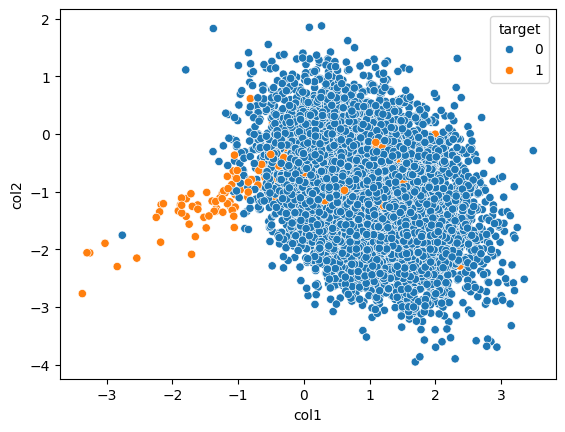

In [ ]:
sns.scatterplot(data=ds,x='col1',y='col2',hue='target')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
class_weights=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [ ]:
print(class_weights)

[{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}]


In [ ]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weights)

In [ ]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}